## Predicting Mobile Phone Prices

### Problem Statement

About to establish a mobile phone start up, but have little knowledge about the prices of moblie phones.

As a result, the need to learn about the price ranges of mobile phones based on their features is essential.

In [31]:
#import necessary libraries for data manipulation and visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [32]:
#import the dataset
df = pd.read_csv('train.csv')

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Data Inspection

In [33]:
df.shape

(2000, 21)

- The dataset contains 2,000 rows and 21 columns.

### Features in the dataset

- batter_power: Total energy a battery can store in one time measured in mAh
- blue: Has bluetooth or not (1 = yes, 0 = no)
- clock_speed: speed at which microprocessor executes instructions
- dual_sim: Has dual sim support or not (1 = yes, 0 = no)
- fc: Front Camera mega pixels
- four_g: Has 4G or not (1 = yes, 0 = no)
- int_memory: Internal Memory in Gigabytes
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Mega Bytes
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last when you are talking
- three_g: Has 3G or not (1 = yes, 0 = no)
- touch_screen: Has touch screen or not (1 = yes, 0 = no)
- wifi: Has wifi or not (1 = yes, 0 = no)
- price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost

In [34]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [36]:
#satistical summary

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [37]:
#inspecting the dataset for missing values

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- there are no missing values in the dataset

In [38]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [39]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### Explolatory Data Analysis

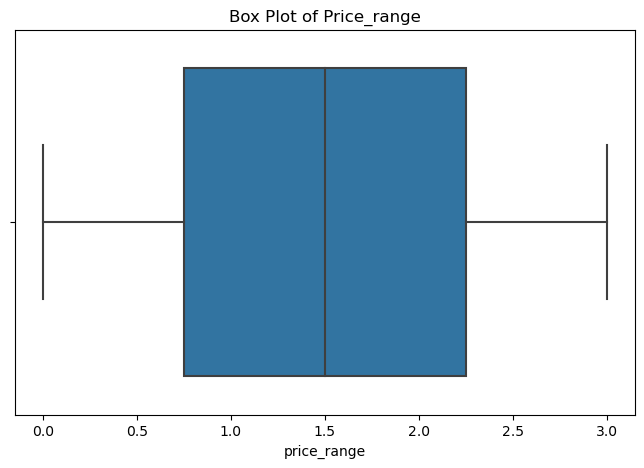

In [40]:
#box plot of the price range.

plt.figure(figsize= (8, 5))
sns.boxplot(data= df, x= 'price_range')
plt.title('Box Plot of Price_range')
plt.xlabel('price_range')
plt.show()

<Axes: >

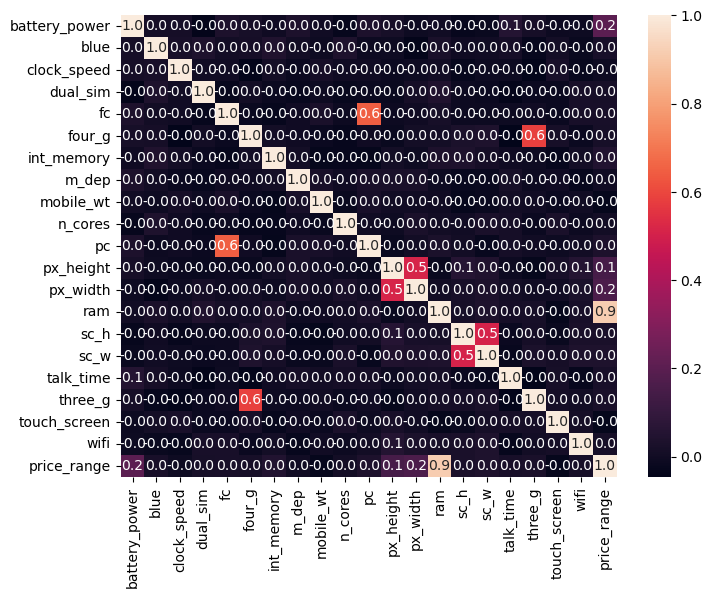

In [41]:
plt.figure(figsize= (8,6))
sns.heatmap(df.corr(), annot = True, fmt = '.1f')

- There is a strong positive correlation between the ram and price_range, with a correlation coefficient of 0.9

In [42]:
#Average price_range of phone

wifi_price_range = df.groupby('wifi')['price_range'].mean().reset_index(
                        name = 'Average Price').sort_values(by= 'Average Price', ascending = False)

wifi_price_range

,wifi,Average Price
1,1,1.520710
0,0,1.478702


In [43]:
Bluetooth_avg_price = df.groupby('blue')['price_range'].mean().reset_index(
                            name = 'Average Price').sort_values(by= 'Average Price', ascending = False)

Bluetooth_avg_price

,blue,Average Price
1,1,1.523232
0,0,1.477228


In [44]:
dual_sim_price = df.groupby('dual_sim')['price_range'].mean().reset_index(
                            name= 'Average Price').sort_values(by= 'Average Price', ascending = False)

dual_sim_price

,dual_sim,Average Price
1,1,1.519136
0,0,1.480122


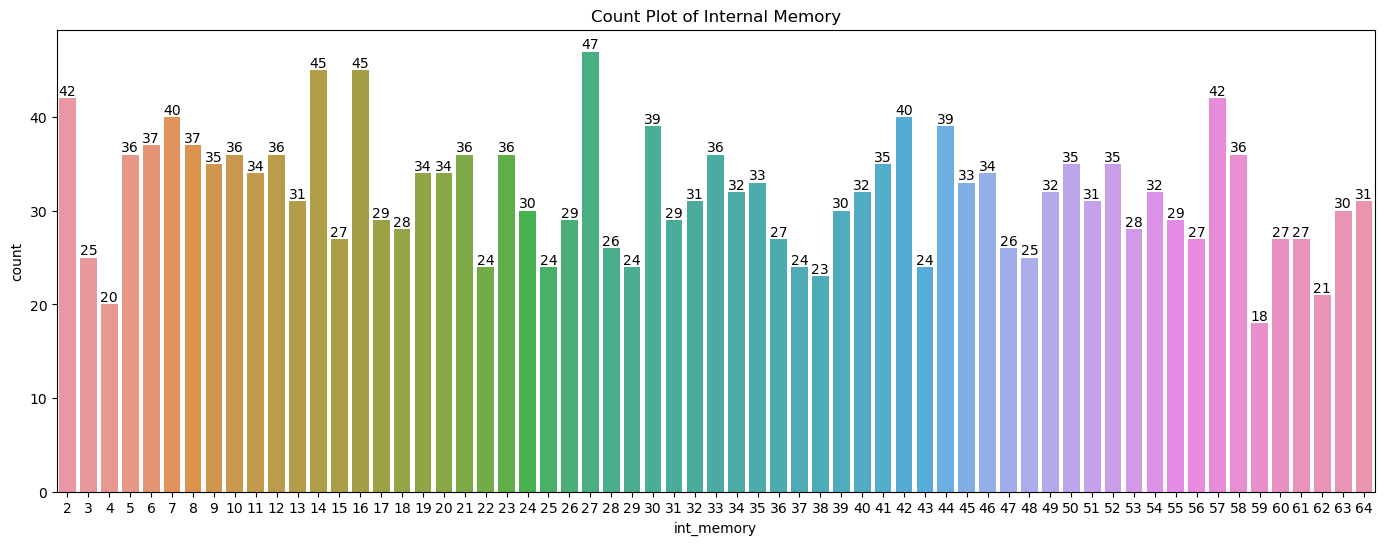

In [45]:
plt.figure(figsize = (17, 6))
fig = sns.countplot(data = df, x = 'int_memory')
for i in fig.containers:
    fig.bar_label(i)
plt.title('Count Plot of Internal Memory')
plt.show()

- Mobile phones with an internal memory of 27 gigabytes is the most used in the dataset.

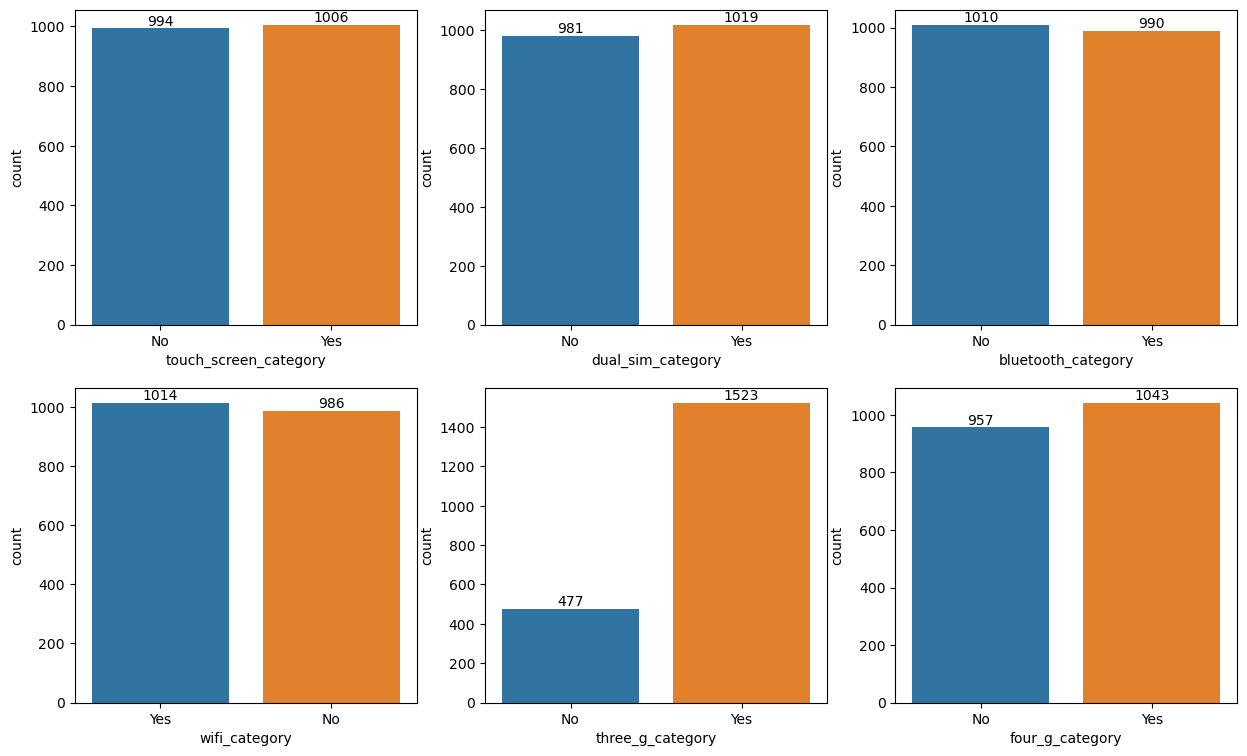

In [46]:
plt.figure(figsize =(15, 9))

#converting numerical to categorical

def ts_category(tc):
    if tc == 1:
        return 'Yes'
    else:
        return 'No'
df['touch_screen_category'] = df['touch_screen'].apply(ts_category)

plt.subplot(2, 3, 1)
a = sns.countplot(data = df, x = 'touch_screen_category')
for i in a.containers:
    a.bar_label(i)

def ds_category(dc):
    if dc == 1:
        return 'Yes'
    else:
        return 'No'
df['dual_sim_category'] = df['dual_sim'].apply(ds_category)
      
plt.subplot(2, 3, 2)
b = sns.countplot(data = df, x = 'dual_sim_category')
for i in b.containers:
    b.bar_label(i)

def blue_category(bc):
    if bc == 1:
        return 'Yes'
    else:
        return 'No'
df['bluetooth_category'] = df['blue'].apply(blue_category)

plt.subplot(2, 3, 3)
c = sns.countplot(data = df, x = 'bluetooth_category')
for i in c.containers:
    c.bar_label(i)

def w_category(wc):
    if wc == 1:
        return 'Yes'
    else:
        return 'No'
df['wifi_category'] = df['wifi'].apply(w_category)

plt.subplot(2, 3, 4)
d = sns.countplot(data = df, x = 'wifi_category')
for i in d.containers:
    d.bar_label(i)

def t_g_category(tgc):
    if tgc == 1:
        return 'Yes'
    else:
        return 'No'
df['three_g_category'] = df['three_g'].apply(t_g_category)
        
plt.subplot(2, 3, 5)
e = sns.countplot(data = df, x = 'three_g_category')
for i in e.containers:
    e.bar_label(i)

def f_g_category(fgc):
    if fgc == 1:
        return 'Yes'
    else:
        return 'No'
df['four_g_category'] = df['four_g'].apply(f_g_category)

plt.subplot(2, 3, 6)
f = sns.countplot(data = df, x = 'four_g_category')
for i in f.containers:
    f.bar_label(i)

#### Observations

- In the count of touch screen chart, it shows that the mobile phones with touch screens have a higher frequency that mobile phones without touch screen.

- In dual sim category chart, it shows that the mobile phones with dual sims have a higher frequency that mobile phones without.

- The count of bluetooth category chart shows that mobile phones without bluetooth have a higher frequency that mobile phones with bluetooth.

- The count of wifi category chart shows that mobile phones with wifi have a higher frequency that mobile phones without wifi.

- In the count of three g category chart, it shows that the mobile phones with 3g have a higher frequency that mobile phones without 3g.

- The count of four g category chart shows that mobile phones with 4g have a higher frequency that mobile phones without 4g. Also, mobile phones with 3g are preferred to mobile phones with 4g in the dataset.

In [49]:
#Machine Learning
#Spiliting the dataset into x
X = df.drop(columns = ['touch_screen_category','dual_sim_category', 'bluetooth_category', 'wifi_category', 
                       'three_g_category', 'four_g_category', 'price_range'] )
y = df['price_range']

In [50]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [51]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [53]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [54]:
classifiers = [[RandomForestClassifier(), 'Random Forest'],[LogisticRegression(), 'Logistic Regression'], [
                        DecisionTreeClassifier(), 'Decision Tree'], [SVC(), 'SVC']]

In [55]:
accuracy_score_li = {}

for i in classifiers:
    model = i[0]
    model_name =i[1]
    model.fit(X_train, y_train)
    
    
    model_predict = model.predict(X_test)
    accuracy = accuracy_score(model_predict, y_test)
    
    accuracy_score_li[model_name] = ([str(round(accuracy * 100)) + '%'])

In [56]:
print('Accuracy Scores')
df2 = pd.DataFrame(accuracy_score_li)
df2

Accuracy Scores


,Random Forest,Logistic Regression,Decision Tree,SVC
0,86%,64%,84%,96%


- Support Vector Classifier(SVC) gives us a higher accuracy of 96%